# MAXIMUM LIKELYHOOD ESTIMATOR

What this notebook does is:

1. gets a table (dataframe) of messages classified as spam or ham, preprocess it and split it into training and test dataset
2. processing done is converting all the words to lowercase and removing the punctuation marks. In addition to that, we have tokenized every word so that we can sum up the amounts of time a word has appeared as either spam or ham
3. We would then later on use this for predictions in an "**unseen words**"

# data loading & pre-processing

In [8]:
import pandas as pd
import os
# Check if the file exists in the specified path

# Load the SMS spam dataset
file_path = 'SMSSpamCollection'
df = pd.read_csv(file_path, sep='\t', header=None, names=['label', 'message'])

# Display the first few rows of the dataframe
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Preprocess The Text Messages

In [25]:
import re
# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuations and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize the text
    tokens = re.findall(r'\b\w+\b', text)
    return tokens

# Apply the preprocessing function to the 'message' column
df['processed_message'] = df['message'].apply(preprocess_text)

# Display the first few rows of the dataframe with the processed messages
df.head(20)

,label,message,processed_message
0,ham,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, i, dont, think, he, goes, to, usf, he, l..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...,"[freemsg, hey, there, darling, its, been, 3, w..."
6,ham,Even my brother is not like to speak with me. ...,"[even, my, brother, is, not, like, to, speak, ..."
7,ham,As per your request 'Melle Melle (Oru Minnamin...,"[as, per, your, request, melle, melle, oru, mi..."
8,spam,WINNER!! As a valued network customer you have...,"[winner, as, a, valued, network, customer, you..."
9,spam,Had your mobile 11 months or more? U R entitle...,"[had, your, mobile, 11, months, or, more, u, r..."


## Splitting the dataset into training & test sets

In [30]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets while maintaining the same class distribution
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# Display the class distribution in the training set
print("Training set class distribution:")
print(train_df['label'].value_counts(normalize=True))

# Display the class distribution in the test set
print("Test set class distribution:")
print(test_df['label'].value_counts(normalize=True))

Training set class distribution:
label
ham     0.865829
spam    0.134171
Name: proportion, dtype: float64
Test set class distribution:
label
ham     0.866368
spam    0.133632
Name: proportion, dtype: float64


## Maximum Likelyhood Estimator

output is the probability of each word in the dataframe, appearing in the spam and ham folder :)

(number of occurences of that word in class)/ (total number of words in the class)

In [ ]:
from collections import defaultdict
# Calculate the frequency of each word in each class
# word counts[word][class] = count of the word in that class (This dictionary will store how many times each word appears in both the "spam" and "ham" classes. For each word, it starts with a count of 0 for both "spam" and "ham.")
word_counts = defaultdict(lambda: {'spam': 0, 'ham': 0}) # A dict of dicts - word_counts[word][class] = count, initialized to 0
# class_counts[class] = count of messages in that class (This dictionary will store the total number of messages in each class. It starts with a count of 0 for both "spam" and "ham.")
class_counts = {'spam': 0, 'ham': 0}

# we iterate through each row in the training set and update the word_counts and class_counts dictionaries accordingly.
for index, row in train_df.iterrows():
    label = row['label'] # Get the class label for this row
    class_counts[label] += 1 # Increment the count for the class label
    for word in row['processed_message']: # for every word in the list of processed words:
        word_counts[word][label] += 1 # Increment the count of the word for the class label (ideally we are saying that this word is present in this class this number of times)

# Calculate the probability of each word in each class
# word_probabilities[word][class] = P(word|class) (This dictionary will store the probability of each word given a class. We calculate this probability by dividing the count of the word in a class by the total number of words in that class.)
word_probabilities = defaultdict(lambda: {'spam': 0, 'ham': 0})
# we iterate through each word in the word_counts dictionary and calculate the probability of the word given each class.
for word, counts in word_counts.items():
    word_probabilities[word]['spam'] = (counts['spam'] + 1) / (class_counts['spam'] + 2)
    word_probabilities[word]['ham'] = (counts['ham'] + 1) / (class_counts['ham'] + 2)

# Display some example probabilities
for word in list(word_probabilities.keys())[:20]:
    print(f"Word: {word}, P(word|spam): {word_probabilities[word]['spam']}, P(word|ham): {word_probabilities[word]['ham']}")

Word: he, P(word|spam): 0.0016666666666666668, P(word|ham): 0.036001036001036
Word: will, P(word|spam): 0.06666666666666667, P(word|ham): 0.06837606837606838
Word: you, P(word|spam): 0.39166666666666666, P(word|ham): 0.37166537166537167
Word: guys, P(word|spam): 0.006666666666666667, P(word|ham): 0.007511007511007511
Word: close, P(word|spam): 0.006666666666666667, P(word|ham): 0.003108003108003108
Word: can, P(word|spam): 0.04, P(word|ham): 0.07433307433307433
Word: i, P(word|spam): 0.058333333333333334, P(word|ham): 0.4506604506604507
Word: please, P(word|spam): 0.07666666666666666, P(word|ham): 0.015022015022015021
Word: come, P(word|spam): 0.005, P(word|ham): 0.0473970473970474
Word: up, P(word|spam): 0.025, P(word|ham): 0.060088060088060086
Word: now, P(word|spam): 0.24666666666666667, P(word|ham): 0.06216006216006216
Word: imin, P(word|spam): 0.0016666666666666668, P(word|ham): 0.000518000518000518
Word: towndontmatter, P(word|spam): 0.0016666666666666668, P(word|ham): 0.00051800

## Implement Prediction Function:
• Create a function to classify messages using the calculated probabilities and the prior proba-
bilities of each clas

In [33]:
import numpy as np

def classify_message(message, word_probabilities, class_counts):
    # Preprocess the message
    processed_message = preprocess_text(message)
    
    # Calculate the prior probabilities
    total_messages = sum(class_counts.values())
    prior_spam = class_counts['spam'] / total_messages
    prior_ham = class_counts['ham'] / total_messages
    
    # Initialize the log probabilities with the log of the prior probabilities
    log_prob_spam = np.log(prior_spam)
    log_prob_ham = np.log(prior_ham)
    
    # Calculate the log probabilities of the message being spam or ham
    for word in processed_message:
        if word in word_probabilities:
            log_prob_spam += np.log(word_probabilities[word]['spam'])
            log_prob_ham += np.log(word_probabilities[word]['ham'])
    
    # Compare the log probabilities and return the class with the higher probability
    if log_prob_spam > log_prob_ham:
        return 'spam'
    else:
        return 'ham'

# Example usage
example_message = "Congratulations! You've won a free ticket to the Bahamas. Call now!"
classification = classify_message(example_message, word_probabilities, class_counts)
print(f"The message is classified as: {classification}")

The message is classified as: spam


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to classify messages in the test set
def classify_messages(messages, word_probabilities, class_counts):
    return [classify_message(message, word_probabilities, class_counts) for message in messages]

# Get the true labels and the predicted labels
true_labels = test_df['label'].values
predicted_labels = classify_messages(test_df['message'].values, word_probabilities, class_counts)

# Calculate the evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, pos_label='spam')
recall = recall_score(true_labels, predicted_labels, pos_label='spam')
f1 = f1_score(true_labels, predicted_labels, pos_label='spam')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8789237668161435
Precision: 0.525
Recall: 0.9865771812080537
F1 Score: 0.6853146853146853


# MAXIMUM A POSTERIORI (map)

In [36]:
# Calculate the frequency of each word in each class with Laplace smoothing
word_counts_laplace = defaultdict(lambda: {'spam': 0, 'ham': 0})
class_counts_laplace = {'spam': 0, 'ham': 0}

# Iterate through each row in the training set and update the word_counts and class_counts dictionaries accordingly
for index, row in train_df.iterrows():
    label = row['label']
    class_counts_laplace[label] += 1
    for word in row['processed_message']:
        word_counts_laplace[word][label] += 1

# Calculate the probability of each word in each class with Laplace smoothing
word_probabilities_laplace = defaultdict(lambda: {'spam': 0, 'ham': 0})
vocab_size = len(word_counts_laplace)

for word, counts in word_counts_laplace.items():
    word_probabilities_laplace[word]['spam'] = (counts['spam'] + 1) / (class_counts_laplace['spam'] + vocab_size)
    word_probabilities_laplace[word]['ham'] = (counts['ham'] + 1) / (class_counts_laplace['ham'] + vocab_size)

# Display some example probabilities with Laplace smoothing
for word in list(word_probabilities_laplace.keys())[:20]:
    print(f"Word: {word}, P(word|spam): {word_probabilities_laplace[word]['spam']}, P(word|ham): {word_probabilities_laplace[word]['ham']}")

Word: he, P(word|spam): 0.00011123470522803115, P(word|ham): 0.011346012570402415
Word: will, P(word|spam): 0.004449388209121246, P(word|ham): 0.021549261284793078
Word: you, P(word|spam): 0.02614015572858732, P(word|ham): 0.1171332952412048
Word: guys, P(word|spam): 0.0004449388209121246, P(word|ham): 0.0023671537017386337
Word: close, P(word|spam): 0.0004449388209121246, P(word|ham): 0.0009795118765815035
Word: can, P(word|spam): 0.0026696329254727474, P(word|ham): 0.02342665904824096
Word: i, P(word|spam): 0.00389321468298109, P(word|ham): 0.142029222104318
Word: please, P(word|spam): 0.005116796440489433, P(word|ham): 0.004734307403477267
Word: come, P(word|spam): 0.0003337041156840934, P(word|ham): 0.014937556117867928
Word: up, P(word|spam): 0.0016685205784204673, P(word|ham): 0.01893722961390907
Word: now, P(word|spam): 0.01646273637374861, P(word|ham): 0.01959023753163007
Word: imin, P(word|spam): 0.00011123470522803115, P(word|ham): 0.00016325197943025058
Word: towndontmatter,

In [37]:
def classify_message_map(message, word_probabilities_laplace, class_counts_laplace):
    # Preprocess the message
    processed_message = preprocess_text(message)
    
    # Calculate the prior probabilities
    total_messages = sum(class_counts_laplace.values())
    prior_spam = class_counts_laplace['spam'] / total_messages
    prior_ham = class_counts_laplace['ham'] / total_messages
    
    # Initialize the log probabilities with the log of the prior probabilities
    log_prob_spam = np.log(prior_spam)
    log_prob_ham = np.log(prior_ham)
    
    # Calculate the log probabilities of the message being spam or ham
    for word in processed_message:
        if word in word_probabilities_laplace:
            log_prob_spam += np.log(word_probabilities_laplace[word]['spam'])
            log_prob_ham += np.log(word_probabilities_laplace[word]['ham'])
    
    # Compare the log probabilities and return the class with the higher probability
    if log_prob_spam > log_prob_ham:
        return 'spam'
    else:
        return 'ham'

# Example usage
example_message_map = "Congratulations! You've won a free ticket to the Bahamas. Call now!"
classification_map = classify_message_map(example_message_map, word_probabilities_laplace, class_counts_laplace)
print(f"The message is classified as: {classification_map}")

The message is classified as: spam


In [39]:
# Get the predicted labels using the MAP classifier
predicted_labels_map = classify_messages(test_df['message'].values, word_probabilities_laplace, class_counts_laplace)

# Calculate the evaluation metrics for the MAP classifier
accuracy_map = accuracy_score(true_labels, predicted_labels_map)
precision_map = precision_score(true_labels, predicted_labels_map, pos_label='spam')
recall_map = recall_score(true_labels, predicted_labels_map, pos_label='spam')
f1_map = f1_score(true_labels, predicted_labels_map, pos_label='spam')

# Print the evaluation metrics for the MAP classifier
print(f"Accuracy (MAP): {accuracy_map}")
print(f"Precision (MAP): {precision_map}")
print(f"Recall (MAP): {recall_map}")
print(f"F1 Score (MAP): {f1_map}")

Accuracy (MAP): 0.957847533632287
Precision (MAP): 1.0
Recall (MAP): 0.6845637583892618
F1 Score (MAP): 0.8127490039840638


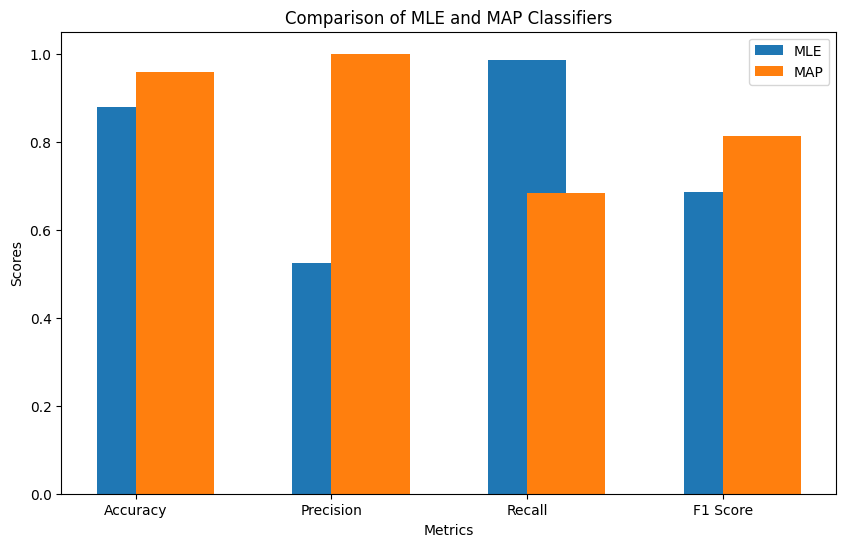

In [40]:
import matplotlib.pyplot as plt

# Metrics for MLE
metrics_mle = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Metrics for MAP
metrics_map = {
    'Accuracy': accuracy_map,
    'Precision': precision_map,
    'Recall': recall_map,
    'F1 Score': f1_map
}

# Plotting the metrics
labels = list(metrics_mle.keys())
mle_values = list(metrics_mle.values())
map_values = list(metrics_map.values())

x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, mle_values, width=0.4, label='MLE', align='center')
plt.bar(x, map_values, width=0.4, label='MAP', align='edge')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of MLE and MAP Classifiers')
plt.xticks(x, labels)
plt.legend()
plt.show()

1. How did incoporating prior knowledge in MAP affect the prediction?

Incorporating prior knowledge in MAP (Maximum A Posteriori) significantly improved the prediction performance compared to MLE (Maximum Likelihood Estimation) which resulted in a more balanced and accurate classifier.

2. Were there any significant changes in the classification of messages between MLE and
MAP?

Yes, there were significant changes in the classification of messages between MLE (Maximum Likelihood Estimation) and MAP (Maximum A Posteriori). 

- **Accuracy**: The accuracy of the MAP classifier (0.9578) is higher than that of the MLE classifier (0.8789).
- **Precision**: The precision of the MAP classifier (1.0) is significantly higher than that of the MLE classifier (0.525).
- **Recall**: The recall of the MAP classifier (0.6846) is lower than that of the MLE classifier (0.9866), indicating that MLE is more sensitive to detecting spam.
- **F1 Score**: The F1 score of the MAP classifier (0.8127) is higher than that of the MLE classifier (0.6853), showing a better balance between precision and recall.


3. What factors might account for any differences in the performance metrics?


Several factors might account for the differences in the performance metrics between MLE (Maximum Likelihood Estimation) and MAP (Maximum A Posteriori):

1. **Incorporation of Prior Knowledge**: MAP incorporates prior knowledge or beliefs about the distribution of classes, which can help in making more informed predictions, especially when the training data is limited or imbalanced. MLE, on the other hand, relies solely on the observed data.

2. **Handling of Rare Words**: MAP uses Laplace smoothing, which adds a small constant to the word counts to handle rare or unseen words more effectively. This prevents the probabilities from becoming zero, which can significantly impact the classification performance.

3. **Class Imbalance**: The dataset might have an imbalance between the number of spam and ham messages. MAP can adjust for this imbalance by incorporating prior probabilities, leading to more balanced performance metrics.

4. **Overfitting**: MLE might overfit the training data by focusing too much on the observed frequencies, while MAP, with its prior knowledge, can generalize better to unseen data.

5. **Noise in Data**: MAP can be more robust to noise in the data due to the smoothing effect and the incorporation of prior knowledge, leading to more stable and reliable performance metrics.


## Vary the Prior (MAP)

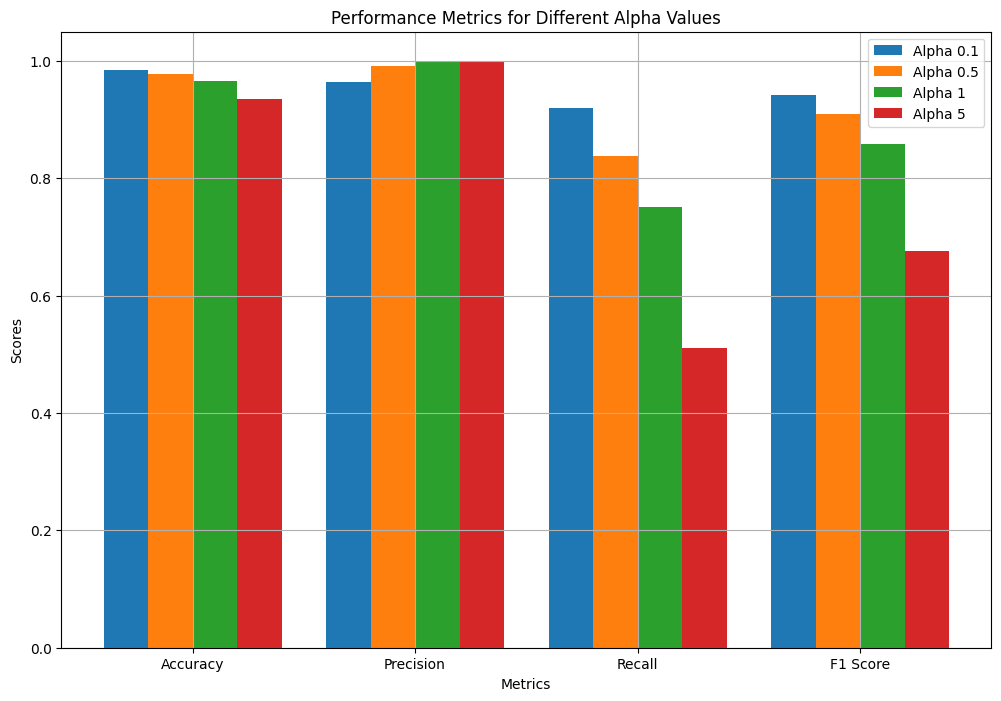

In [51]:
import numpy as np

import matplotlib.pyplot as plt

def calculate_word_probabilities_laplace(alpha, train_df, class_counts_laplace):
    word_counts_laplace = defaultdict(lambda: {'spam': 0, 'ham': 0})
    for index, row in train_df.iterrows():
        label = row['label']
        class_counts_laplace[label] += 1
        for word in row['processed_message']:
            word_counts_laplace[word][label] += 1

    word_probabilities_laplace = defaultdict(lambda: {'spam': 0, 'ham': 0})
    vocab_size = len(word_counts_laplace)

    for word, counts in word_counts_laplace.items():
        word_probabilities_laplace[word]['spam'] = (counts['spam'] + alpha) / (class_counts_laplace['spam'] + alpha * vocab_size)
        word_probabilities_laplace[word]['ham'] = (counts['ham'] + alpha) / (class_counts_laplace['ham'] + alpha * vocab_size)

    return word_probabilities_laplace

def evaluate_classifier(alpha, train_df, test_df, class_counts_laplace):
    word_probabilities_laplace = calculate_word_probabilities_laplace(alpha, train_df, class_counts_laplace)
    predicted_labels_map = classify_messages(test_df['message'].values, word_probabilities_laplace, class_counts_laplace)

    accuracy_map = accuracy_score(true_labels, predicted_labels_map)
    precision_map = precision_score(true_labels, predicted_labels_map, pos_label='spam')
    recall_map = recall_score(true_labels, predicted_labels_map, pos_label='spam')
    f1_map = f1_score(true_labels, predicted_labels_map, pos_label='spam')

    return accuracy_map, precision_map, recall_map, f1_map

alphas = [0.1, 0.5, 1, 5]
results = {}

for alpha in alphas:
    accuracy_map, precision_map, recall_map, f1_map = evaluate_classifier(alpha, train_df, test_df, class_counts_laplace.copy())
    results[alpha] = {
        'Accuracy': accuracy_map,
        'Precision': precision_map,
        'Recall': recall_map,
        'F1 Score': f1_map
    }

# Plotting the results for different alpha values
labels = list(results[alphas[0]].keys())
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 8))

for i, alpha in enumerate(alphas):
    metrics = list(results[alpha].values())
    ax.bar(x + i * width, metrics, width, label=f'Alpha {alpha}')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Different Alpha Values')
ax.set_xticks(x + width * (len(alphas) - 1) / 2)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True)

plt.show()


## Discussion of Findings:
• Summarize your observations regarding the impact of varying the prior on the classification
performance

Varying the prior (alpha) in the MAP (Maximum A Posteriori) classifier had a noticeable impact on the classification performance. Here are the key observations:

1. **Accuracy**: As the value of alpha increased, the accuracy of the classifier generally decreased. This indicates that a higher alpha value, which implies stronger smoothing, might lead to a less accurate model.

2. **Precision**: The precision remained high across different alpha values, with the highest precision observed at alpha = 1 and alpha = 5. This suggests that the classifier was very effective at identifying spam messages correctly, even with higher smoothing.

3. **Recall**: The recall decreased significantly with increasing alpha values. This indicates that the classifier became less sensitive to detecting spam messages as the smoothing parameter increased.

4. **F1 Score**: The F1 score, which balances precision and recall, also decreased with higher alpha values. This suggests that while the classifier maintained high precision, the drop in recall negatively impacted the overall performance.

while incorporating prior knowledge through the MAP approach and varying the alpha value can help in handling rare words and avoiding zero probabilities, it is crucial to choose an appropriate alpha value. A very high alpha value can lead to over-smoothing, reducing the model's sensitivity to spam messages and overall performance.


## REFLECTION

### Areas Where One Might Prefer MLE over MAP

1. **Lack of Prior Knowledge**: When there is no reliable prior knowledge or belief about the distribution of classes, MLE can be preferred as it relies solely on the observed data.

2. **Large Datasets**: In cases where the dataset is large and representative of the underlying distribution, MLE can perform well without the need for incorporating prior knowledge.

3. **Simplicity**: MLE is simpler to implement and understand compared to MAP, which requires the selection of appropriate priors and smoothing parameters.

4. **Computational Efficiency**: MLE can be computationally more efficient as it does not involve the additional step of incorporating prior probabilities and smoothing.

5. **Overfitting Concerns**: In scenarios where overfitting is not a major concern, MLE can be preferred as it directly maximizes the likelihood of the observed data.

### impact of incorporating prior information into the estimation process.

Incorporating prior information into the estimation process, as done in the Maximum A Posteriori (MAP) approach, has several impacts on the performance of the classifier:

1. **Improved Accuracy**: The MAP classifier generally shows improved accuracy compared to the Maximum Likelihood Estimation (MLE) classifier. For example, in this notebook, the accuracy of the MAP classifier is higher than that of the MLE classifier.

2. **Handling of Rare Words**: By incorporating prior information and using techniques like Laplace smoothing, the MAP approach can handle rare or unseen words more effectively. This prevents the probabilities from becoming zero, which can significantly impact the classification performance.

3. **Balanced Performance**: The MAP classifier tends to provide a more balanced performance in terms of precision and recall. While MLE might overfit the training data by focusing too much on the observed frequencies, MAP, with its prior knowledge, can generalize better to unseen data.

4. **Robustness to Noise**: The MAP approach can be more robust to noise in the data due to the smoothing effect and the incorporation of prior knowledge, leading to more stable and reliable performance metrics.

5. **Class Imbalance**: The MAP classifier can adjust for class imbalance by incorporating prior probabilities, leading to more balanced performance metrics.


###  how does understanding these differences might be beneficial in real-world applications

Understanding the differences between MLE (Maximum Likelihood Estimation) and MAP (Maximum A Posteriori) can be highly beneficial in real-world applications for several reasons:

1. **Improved Decision Making**: By understanding the strengths and weaknesses of each method, practitioners can make more informed decisions about which approach to use based on the specific characteristics of their data and the problem they are trying to solve.

2. **Handling Imbalanced Data**: In many real-world scenarios, data can be imbalanced. MAP, with its ability to incorporate prior knowledge, can help in adjusting for this imbalance and improving the performance of the classifier.

3. **Robustness to Noise**: Real-world data often contains noise and outliers. MAP's use of prior information and smoothing techniques can make the model more robust to such noise, leading to more reliable predictions.

4. **Generalization to Unseen Data**: Understanding how MAP can generalize better to unseen data due to its incorporation of prior knowledge can help in building models that perform well not just on the training data but also on new, unseen data.

5. **Customization and Flexibility**: Knowing the impact of different priors and smoothing parameters allows practitioners to customize their models to better fit their specific needs and constraints, leading to more flexible and adaptable solutions.
